# IS 362 - Week 5 Assignment

In [1]:
# import libraries
import pandas as pd
import numpy as np

# load airports data from csv
airports = pd.read_csv("airports.csv")

# check the first 5 rows 
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


## Tidy Data
Before working on the DataFrame, I would check if there is any data with missing values (contain NaN)

In [2]:
airports.isnull().sum()

faa      0
name     0
lat      0
lon      0
alt      0
tz       0
dst      0
tzone    3
dtype: int64

The time zone column tzone has 3 missing data. We will check these data and modify them with accurante information.

In [3]:
airports[airports.tzone.isnull()]

,faa,name,lat,lon,alt,tz,dst,tzone
417,EEN,Dillant Hopkins Airport,72.270833,42.898333,149,-5,A,NaN
815,LRO,Mount Pleasant Regional-Faison Field,32.538700,-79.469700,12,-5,A,NaN
1434,YAK,Yakutat,59.301200,-139.393700,33,-9,A,NaN


By searching information online, here are the data for missing cells. There were also errors on the lat and lon column for Dillant Hopkins Airport.

EEN: https://www.weather.gov/wrh/timeseries?site=KEEN

LRO: https://www.weather.gov/wrh/timeseries?site=KLRO

YAK: https://weathercams.faa.gov/map/-139.66,57.54467,6/airport/YAK/details/pdfs
        

| id | faa | name | lat | lon| alt | tz | dst| tzone |
|---|---|---|---|---|---|---|---|---|
|417|EEN|Dillant Hopkins Airport|42.898333|-72.270833|488|-5|A|America/New_York|
|815|LRO|Mount Pleasant Regional-Faison Field|32.538700|-79.469700|12|-5|A|America/New_York|
|1434|YAK|Yakutat Airport|59.301200	|-139.393700|33|-9|A|America/Anchorage|

I will replace the rows with the accurate data.

In [5]:
# replace data
airports.iloc[417] = ['EEN', 'Dillant Hopkins Airport', 42.898333, -72.270833, 488, -5, 'A', 'America/New_York']
airports.iloc[815] = ['LRO', 'Mount Pleasant Regional-Faison Field', 32.538700, -79.469700, 12, -5, 'A', 'America/New_York']
airports.iloc[1434] = ['YAK', 'Yakutat Airport', 59.301200, -139.393700, 33, -9, 'A', 'America/Anchorage']

In [6]:
# show the modified data
airports.iloc[[417,815,1434]]

,faa,name,lat,lon,alt,tz,dst,tzone
417,EEN,Dillant Hopkins Airport,42.898333,-72.270833,488,-5,A,America/New_York
815,LRO,Mount Pleasant Regional-Faison Field,32.538700,-79.469700,12,-5,A,America/New_York
1434,YAK,Yakutat Airport,59.301200,-139.393700,33,-9,A,America/Anchorage


## 1. What is the northernmost airport in the United States?
Latitude measures the distance north or south of the equator (+90 being most North, and -90 being most south). By sorting DataFrame with the latitude (lat) column, the airport with the largesting positive number would be the northernmost airport.

Next, I would consider the time zone location column (tzone) to see if the airport is in the United States.

In [7]:
'''
Display the top 5 northernmost airport
    - sorting the Dataframe by column "lat" from greatest to smallest
    - use Ascending = False
'''
airports.sort_values('lat', ascending = False).head()

,faa,name,lat,lon,alt,tz,dst,tzone
230,BRW,Wiley Post Will Rogers Mem,71.285446,-156.766003,44,-9,A,America/Anchorage
110,AIN,Wainwright Airport,70.638056,-159.994722,41,-9,A,America/Anchorage
708,K03,Wainwright As,70.613378,-159.860350,35,-9,A,America/Anchorage
152,ATK,Atqasuk Edward Burnell Sr Memorial Airport,70.467300,-157.436000,96,-9,A,America/Anchorage
1363,UUK,Ugnu-Kuparuk Airport,70.330833,-149.597500,67,-9,A,America/Anchorage


<b>Answer:<b>
The northernmost airport in the United States is <b>Wiley Post Will Rogers Memorial Airport (BRW)<b>

From the result of the sorted airports data, Wiley Post Will Rogers Mem (BRW) has the greatest latitude (lat) of 71.285446. Its time zone (tzone) is also in America/Anchorage, which is Alaska time zone.
    
    I searched Wiley Post Will Rogers Memorial Airport on the web. The airport is at Utqiagvik, Alaska, which has the same time zone as America/Anchorage. It has latitude of 71.28528, which is close to the values in the dataframe. I also searched "what is the northernmost airport in united states", the top answers shows Wiley Post Will Rogers Memorial Airport.
    
    source: https://www.weather.gov/wrh/timeseries?site=PABR

## 2. What is the easternmost airport in the United States?
Longitude measures distance east or west of the prime meridian (+180 being most East, and -180 being most West).By sorting DataFrame with the longitude (lon) column, the airport with the largesting positive number would be the easternmost airport.

Next, I would consider the time zone location column (tzone) to see if the airport is in the United States.

In [8]:
'''
Display the top 5 easternmost airport
    - sorting the Dataframe by column "lon" from greatest to smallest
    - use Ascending = False
'''
airports.sort_values('lon', ascending = False).head()

,faa,name,lat,lon,alt,tz,dst,tzone
1290,SYA,Eareckson As,52.712275,174.113620,98,-9,A,America/Anchorage
942,MYF,Montgomery Field,32.475900,117.759000,17,8,A,Asia/Chongqing
396,DVT,Deer Valley Municipal Airport,33.411700,112.457000,1478,8,A,Asia/Chongqing
444,EPM,Eastport Municipal Airport,44.910111,-67.012694,45,-5,A,America/New_York
624,HUL,Houlton Intl,46.123083,-67.792056,489,-5,A,America/New_York


<b>Answer: <b>

<b>The easternmost airport in the United States relative to the United States is Eastport Municipal Airport (EPM). The easternmost airport of the united states by referencing the prime meridian is Eareckson As (SYA).<b>

From the top 5 results of the sorted airports data, Eareckson As(SYA) has the greatest longitude (lon: 174.113620) and is in the United States time zone (tzone: America/Anchorage). By searching Eareckson As online, the longitude 174.113589 is close to the value in the dataframe. The airport is at Shemya, Alaska.

    The next airport with the greatest longitude and in the United States is Eastport Municipal Airport, with longitude of -67.012694 and America/New_York time zone. By searching Eastport Municipal Airport online, I found that the airport is near Eastport, Maine. The longitude of -67.0099 is close to the value in the dataframe. I also searched "what is the northernmost airport in united states", the top answers shows Eastport Municipal Airport as one of the easternmost United States Airport.
    
    Sources: 
    https://www.airnav.com/airport/KEPM
    https://www.universalweather.com/airports/PASY-SYA-EARECKSON-AS-AIRPORT-SHEMYA-ALASKA-UNITED-STATES/
    

## 3. On February 12th, 2013, which New York area airport had the windiest weather?

First, I will import the weather data.

In [9]:
# import weather csv
NY_airports = pd.read_csv("weather.csv")

# check the first 5 rows
NY_airports.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


Next, I will filter the weather data by Year of 2013, month of February (2), and day of 12. The filtered data will only display information on February 12th, 2013.

In [10]:
# filter to display data only on February 12th, 2013
NY_airport_2013_02_12 = NY_airports[ (NY_airports.year == 2013) & (NY_airports.month == 2) & (NY_airports.day == 12)]

# check the first five rows
NY_airport_2013_02_12.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
1006,EWR,2013,2,12,0,39.92,39.02,96.55,240.0,6.90468,NaN,0.0,1006.9,10.0,2013-02-12T05:00:00Z
1007,EWR,2013,2,12,1,39.92,37.94,92.56,250.0,9.20624,NaN,0.0,1007.2,10.0,2013-02-12T06:00:00Z
1008,EWR,2013,2,12,2,39.92,28.04,62.21,270.0,20.71404,25.31716,0.0,1007.8,10.0,2013-02-12T07:00:00Z
1009,EWR,2013,2,12,3,39.02,26.96,61.63,260.0,1048.36058,NaN,0.0,1008.3,10.0,2013-02-12T08:00:00Z
1010,EWR,2013,2,12,4,39.02,26.96,64.29,280.0,12.65858,NaN,0.0,1008.8,10.0,2013-02-12T09:00:00Z


Next, I would group the data by origin (the airport), and check their maximum, minimum, and average wind speed.

In [11]:
# calculate the mean, max, min wind speed of the New York airports.
NY_airport_2013_02_12.groupby('origin').wind_speed.agg(['count', 'min','max', 'mean'])

,count,min,max,mean
origin,,,,
EWR,24,4.60312,1048.36058,56.38822
JFK,24,4.60312,20.71404,14.38475
LGA,24,4.60312,23.01560,14.96014


There are three airports in the New York area: EWR, JFK, and LGA. The result shows that EWR has the highest maximum and average wind speed. However, the maximum of 1048.36058 is too high compared to the mean. I have to check the data of each airport and filter the outliers.

I will use boxplot from the matplotlib library to check outliers.

In [12]:
# import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

<Axes: >

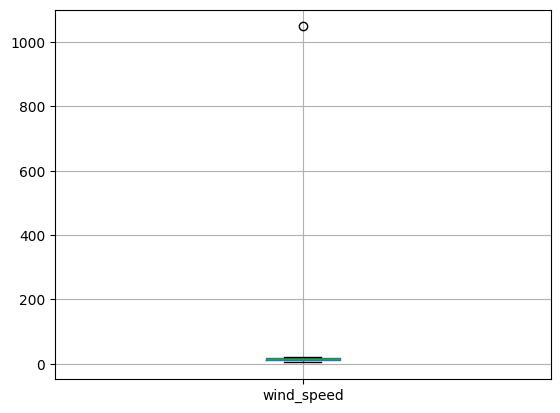

In [13]:
# display boxplot for EWR
EWR_data = NY_airport_2013_02_12[NY_airport_2013_02_12.origin == 'EWR']
EWR_data.boxplot(column='wind_speed')

The box plot of EWR data shows an outlier with wind speed greater than 1000, but the maximum wind speed besided the outlier is below 100. We will filter the data by setting the wind_speed to be less than 100.

<Axes: >

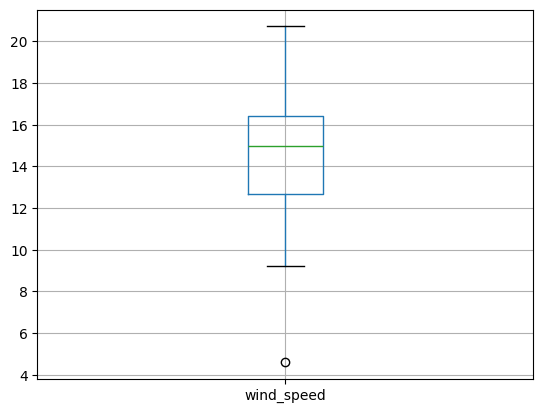

In [14]:
# display boxplot for JFK
JFK_data = NY_airport_2013_02_12[NY_airport_2013_02_12.origin == 'JFK']
JFK_data.boxplot(column='wind_speed')

The boxplot of JFK airport data shows an outlier with wind speed below 5.

<Axes: >

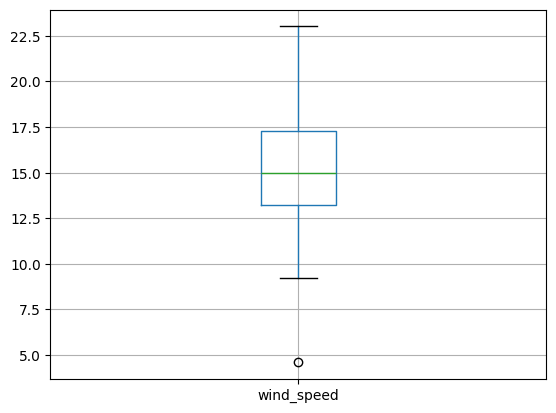

In [15]:
# display boxplot for LGA
LGA_data = NY_airport_2013_02_12[NY_airport_2013_02_12.origin == 'LGA']
LGA_data.boxplot(column='wind_speed')

The boxplot of LGA airport data shows an outlier with wind speed below 5.

Filter 1: I will filter out the wind speed less than 100 only. Since all three airports have minimum wind speed around 4.6, the minimum wind speed might not be an outlier in terms of data from all three airports.

In [29]:
# Filter out the wind speed less than 100 only
Filtered_1_NY_airport_2013_02_12 = NY_airport_2013_02_12[(NY_airport_2013_02_12.wind_speed < 100)]

In [30]:
# calculate the mean, max, min wind speed of the New York airports using the filtered data.
Filtered_1_NY_airport_2013_02_12.groupby('origin').wind_speed.agg(['count', 'min','max', 'mean'])

,count,min,max,mean
origin,,,,
EWR,23,4.60312,21.86482,13.258987
JFK,24,4.60312,20.71404,14.384750
LGA,24,4.60312,23.01560,14.960140


Filter 2: I will filter the airport weather data with the wind speed less than 100 and greater than 5

In [31]:
# Filter out the wind speed less than 100 and greater than 5
Filtered_2_NY_airport_2013_02_12 = NY_airport_2013_02_12[(NY_airport_2013_02_12.wind_speed < 100) & (NY_airport_2013_02_12.wind_speed > 5)]

In [32]:
# calculate the mean, max, min wind speed of the New York airports using the filtered data.
Filtered_2_NY_airport_2013_02_12.groupby('origin').wind_speed.agg(['count', 'min','max', 'mean'])

,count,min,max,mean
origin,,,,
EWR,22,5.75390,21.86482,13.652435
JFK,23,9.20624,20.71404,14.810038
LGA,23,9.20624,23.01560,15.410445


<b> Answer: <b>
    If the windest weather is considered by the maximum wind speed, EWR has the greatest maximum wind speed of 21.86482. If the windest weather is considered by the average wind speed, LGA has the largest average speed. I would use the average wind speed as the factor.
    <b>On February 12th, 2013, which LGA airport had the windiest weather<b>